In [111]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [112]:
working_path = "D:/Semester 5/MachineORDeep Learning/Final Project"
file_names = ['encoded-dogcat-img-16.csv', 'encoded-dogcat-img-32.csv', 'encoded-dogcat-img-64.csv', 'encoded-dogcat-img-128.csv']
# file_names = ['encoded-dogcat-img-32.csv']



In [113]:
callbacks = [
    # Early stopping untuk menghentikan pelatihan jika tidak ada peningkatan dalam validasi setelah beberapa epoch
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    
    # ModelCheckpoint untuk menyimpan model dengan akurasi validasi terbaik
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
]

In [114]:
models = []
accuracies = []
histories = []

for i, f in enumerate(file_names):
    print(f"==> Start Model {file_names[i]} <==")
    
    # Load dataset
    df = pd.read_csv(f'{working_path}/dataset/dogcat-encode/{f}')
    df = df.iloc[:, 1:]

    X = df.iloc[:, :-1]
    y = df.iloc[:, -1:]

    # Linear Discriminant Analysis (LDA)
    lda = LinearDiscriminantAnalysis(n_components=min(X.shape[1], y.iloc[:, 0].nunique()-1))
    X_lda = lda.fit_transform(X, y)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

    # Sequential model initialization
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, input_shape=(X_train.shape[1],), activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)
    
    models.append(model)
    histories.append(history)

    last_accuracy = history.history['val_accuracy'][-1]
    accuracies.append(last_accuracy)

    print(f"==> End Model {file_names[i]} <==")

==> Start Model encoded-dogcat-img-16.csv <==


c:\ProgramData\anaconda3\envs\mdl\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/50


21/21 [==============================] - 1s 16ms/step - loss: 1.3144 - accuracy: 0.4341 - val_loss: 1.1935 - val_accuracy: 0.5926
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 1.1118 - accuracy: 0.6248 - val_loss: 0.9981 - val_accuracy: 0.6420
Epoch 3/50
21/21 [==============================] - 0s 9ms/step - loss: 0.9698 - accuracy: 0.6574 - val_loss: 0.8606 - val_accuracy: 0.6790
Epoch 4/50
21/21 [==============================] - 0s 6ms/step - loss: 0.8919 - accuracy: 0.6605 - val_loss: 0.7958 - val_accuracy: 0.6790
Epoch 5/50
21/21 [==============================] - 0s 8ms/step - loss: 0.8621 - accuracy: 0.6543 - val_loss: 0.7569 - val_accuracy: 0.7160
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.8527 - accuracy: 0.6558 - val_loss: 0.7382 - val_accuracy: 0.7160
Epoch 7/50
21/21 [==============================] - 0s 8ms/step - loss: 0.8495 - accuracy: 0.6605 - val_loss: 0.7324 - val_accuracy: 0.7222
Epoch 8/50
21/21 [============

c:\ProgramData\anaconda3\envs\mdl\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/50
21/21 [==============================] - 2s 27ms/step - loss: 0.9454 - accuracy: 0.6946 - val_loss: 0.3537 - val_accuracy: 0.9877
Epoch 2/50
21/21 [==============================] - 0s 7ms/step - loss: 0.1868 - accuracy: 1.0000 - val_loss: 0.0950 - val_accuracy: 1.0000
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0584 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 1.0000
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 6/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0174 - val_accuracy: 1.0000
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 8/50
21/21 [=

c:\ProgramData\anaconda3\envs\mdl\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/50
21/21 [==============================] - 1s 17ms/step - loss: 1.2581 - accuracy: 0.4899 - val_loss: 1.1154 - val_accuracy: 0.7099
Epoch 2/50
21/21 [==============================] - 0s 5ms/step - loss: 1.0161 - accuracy: 0.7008 - val_loss: 0.9294 - val_accuracy: 0.7407
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 0.8585 - accuracy: 0.7271 - val_loss: 0.8307 - val_accuracy: 0.7593
Epoch 4/50
21/21 [==============================] - 0s 5ms/step - loss: 0.7824 - accuracy: 0.7349 - val_loss: 0.7825 - val_accuracy: 0.7469
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 0.7520 - accuracy: 0.7333 - val_loss: 0.7614 - val_accuracy: 0.7531
Epoch 6/50
21/21 [==============================] - 0s 5ms/step - loss: 0.7439 - accuracy: 0.7395 - val_loss: 0.7584 - val_accuracy: 0.7531
Epoch 7/50
21/21 [==============================] - 0s 4ms/step - loss: 0.7350 - accuracy: 0.7364 - val_loss: 0.7527 - val_accuracy: 0.7593
Epoch 8/50
21/21 [=

c:\ProgramData\anaconda3\envs\mdl\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/50
21/21 [==============================] - 2s 24ms/step - loss: 1.2859 - accuracy: 0.4496 - val_loss: 1.2232 - val_accuracy: 0.5741
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 1.1895 - accuracy: 0.5535 - val_loss: 1.1519 - val_accuracy: 0.6358
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 1.1305 - accuracy: 0.5829 - val_loss: 1.1087 - val_accuracy: 0.6543
Epoch 4/50
21/21 [==============================] - 0s 7ms/step - loss: 1.0919 - accuracy: 0.5984 - val_loss: 1.0803 - val_accuracy: 0.6605
Epoch 5/50
21/21 [==============================] - 0s 6ms/step - loss: 1.0703 - accuracy: 0.6000 - val_loss: 1.0644 - val_accuracy: 0.6481
Epoch 6/50
21/21 [==============================] - 0s 7ms/step - loss: 1.0541 - accuracy: 0.6016 - val_loss: 1.0587 - val_accuracy: 0.6420
Epoch 7/50
21/21 [==============================] - 0s 6ms/step - loss: 1.0467 - accuracy: 0.6031 - val_loss: 1.0614 - val_accuracy: 0.6420
Epoch 8/50
21/21 [=

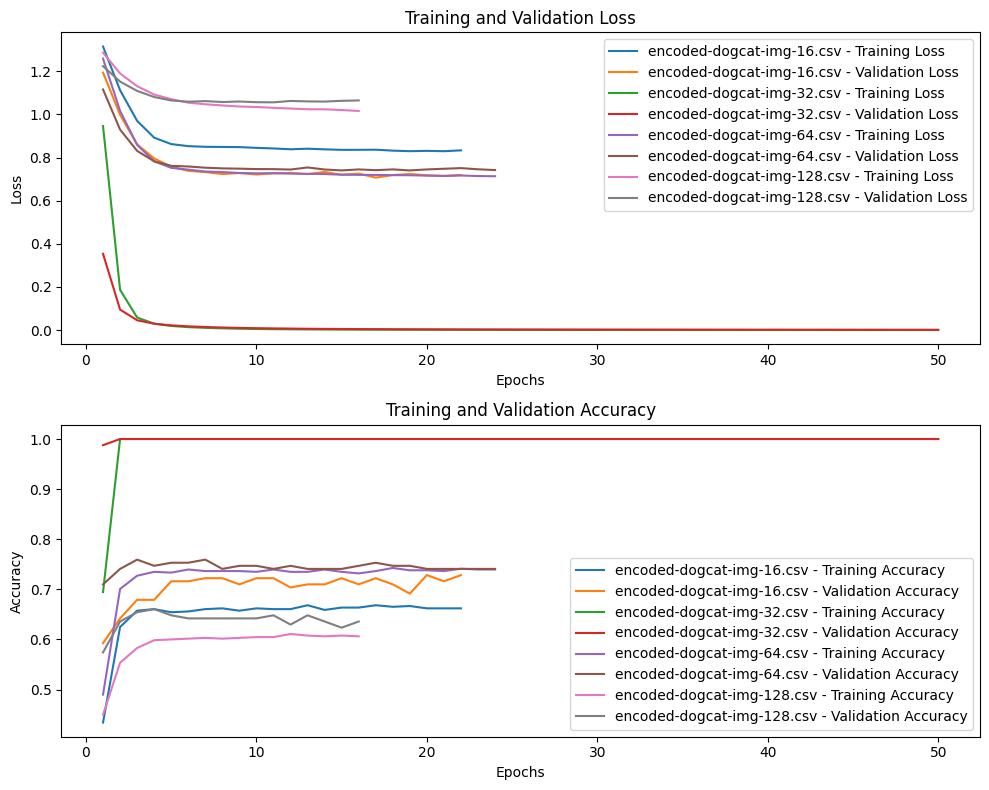

In [115]:
plt.figure(figsize=(10, 8))

# Plot loss
plt.subplot(2, 1, 1)  # Dua baris, satu kolom, plot pertama
for i, history in enumerate(histories):
    epochs = range(1, len(history.history['loss']) + 1)
    plt.plot(epochs, history.history['loss'], label=f'{file_names[i]} - Training Loss')
    plt.plot(epochs, history.history['val_loss'], label=f'{file_names[i]} - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot akurasi
plt.subplot(2, 1, 2)  # Dua baris, satu kolom, plot kedua
for i, history in enumerate(histories):
    epochs = range(1, len(history.history['accuracy']) + 1)
    plt.plot(epochs, history.history['accuracy'], label=f'{file_names[i]} - Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label=f'{file_names[i]} - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [116]:
res_nn_model = pd.DataFrame({
    'dataset_source': file_names,
    'accuracy' : accuracies
})

res_nn_model.head()

,dataset_source,accuracy
0,encoded-dogcat-img-16.csv,0.728395
1,encoded-dogcat-img-32.csv,1.000000
2,encoded-dogcat-img-64.csv,0.740741
3,encoded-dogcat-img-128.csv,0.635802


In [117]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Preprocessing: Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fungsi untuk membuat blok konvolusi ResNet untuk data tabular
def residual_block(input_tensor, filters, kernel_size):
    x = tf.keras.layers.Dense(filters, activation='relu')(input_tensor)
    x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Dense(filters, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # Shortcut connection
    shortcut = tf.keras.layers.Dense(filters)(input_tensor)
    shortcut = tf.keras.layers.BatchNormalization()(shortcut)
    # Tambahkan shortcut ke output
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)
    return x

# Membuat model ResNet untuk data Iris
input_shape = X_train.shape[1]

inputs = tf.keras.layers.Input(shape=(input_shape,))
x = tf.keras.layers.Reshape((input_shape, 1))(inputs)  # Menambahkan dimensi untuk keperluan Conv1D

x = residual_block(x, 64, 3)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)  # Output layer dengan 3 kelas (Iris memiliki 3 kelas)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
4/4 [==============================] - 5s 168ms/step - loss: 1.1340 - accuracy: 0.4750 - val_loss: 0.9415 - val_accuracy: 0.8333
Epoch 2/10
4/4 [==============================] - 0s 18ms/step - loss: 0.6443 - accuracy: 0.7417 - val_loss: 0.8426 - val_accuracy: 0.8667
Epoch 3/10
4/4 [==============================] - 0s 15ms/step - loss: 0.4581 - accuracy: 0.8583 - val_loss: 0.7763 - val_accuracy: 0.9000
Epoch 4/10
4/4 [==============================] - 0s 17ms/step - loss: 0.3873 - accuracy: 0.8583 - val_loss: 0.7283 - val_accuracy: 0.9000
Epoch 5/10
4/4 [==============================] - 0s 17ms/step - loss: 0.3600 - accuracy: 0.8917 - val_loss: 0.6971 - val_accuracy: 0.9000
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 0.3231 - accuracy: 0.9250 - val_loss: 0.6727 - val_accuracy: 0.9000
Epoch 7/10
4/4 [==============================] - 0s 20ms/step - loss: 0.3053 - accuracy: 0.9167 - val_loss: 0.6540 - val_accuracy: 0.9333
Epoch 8/10
4/4 [==========

In [118]:
# accuracy_per_n = {}


# models = []
# accuracies = []
# histories = []

# for i, f in enumerate(file_names):
#   print(f"==> Start Model {file_names[i]} <==")
#   df = pd.read_csv(f'{working_path}/dataset/dogcat-encode/{f}')
#   df = df.iloc[:,1:]

#   X = df.iloc[:,:-1]
#   y = df.iloc[:,-1:]

#     # Mencoba berbagai nilai n_components
#   for n in range(1, min(X.shape[1], y.iloc[:, 0].nunique())):
#     lda = LinearDiscriminantAnalysis(n_components=n)
#     X_lda = lda.fit_transform(X, y)

#     X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(50, input_shape=(X_train.shape[1],), activation='relu'),
#         tf.keras.layers.Dense(50, activation='relu'),
#         tf.keras.layers.Dense(4, activation='softmax')
#     ])

#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

#     last_accuracy = history.history['val_accuracy'][-1]

#     # Menyimpan akurasi untuk setiap n_components
#     if n in accuracy_per_n:
#         accuracy_per_n[n].append(last_accuracy)
#     else:
#         accuracy_per_n[n] = [last_accuracy]

#     print(f"n_components: {n}, Validation Accuracy: {last_accuracy}")

#   print(f"==> End Model {file_names[i]} <==")


#   # Compile model
#   model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#   # Latih model
#   history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)
#   models.append(model)
#   histories.append(history)

#   last_accuracy = history.history['val_accuracy'][-1]  # Mengambil akurasi validasi terakhir
#   accuracies.append(last_accuracy)

#   print(f"==> End Model {file_names[i]} <==")

In [119]:
# # Plot hasil akurasi untuk setiap n_components
# plt.figure(figsize=(10, 6))
# for n, accs in accuracy_per_n.items():
#     plt.plot([n] * len(accs), accs, marker='o', linestyle='-', label=f'n_components={n}')

# plt.xlabel('n_components')
# plt.ylabel('Validation Accuracy')
# plt.legend()
# plt.title('Validation Accuracy for Different n_components')
# plt.show()
